In [2]:
import numpy as np
import numpy.polynomial.polynomial as poly

import matplotlib.pyplot as plt
from scipy import interpolate
from scipy import optimize

89
37


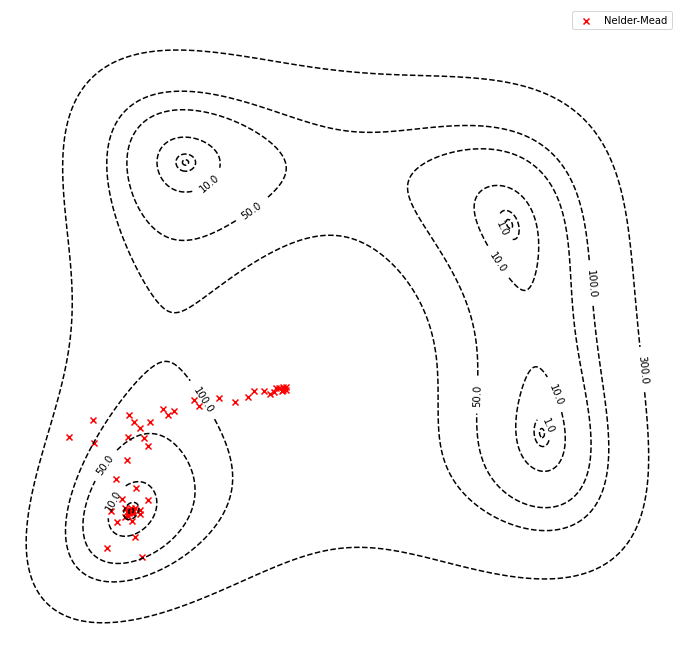

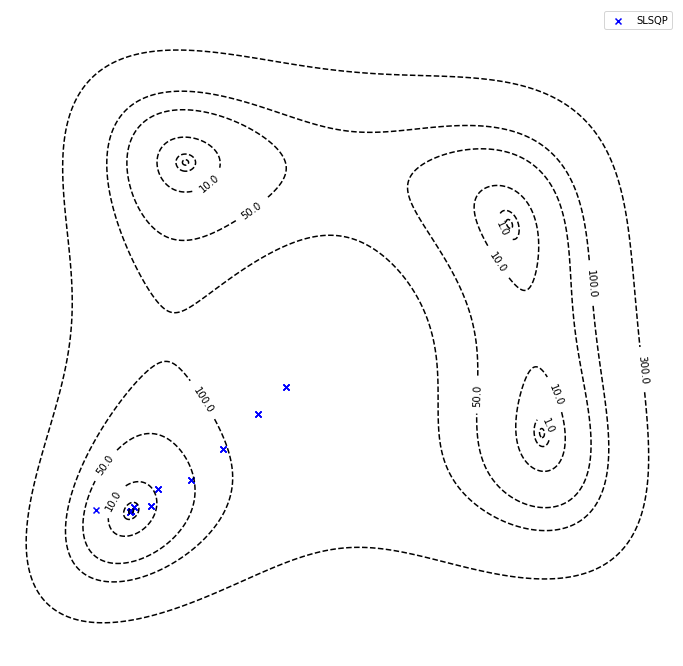

In [3]:
def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x+y**2 - 7)**2

simplex_verticies = []
SLSQP_points = []

simplex_values = []
slsqp_values = []

def himmelblau_simplex(x):
    simplex_verticies.append(x)
    simplex_values.append(himmelblau(x[0], x[1]))
    return himmelblau(x[0], x[1])

def himmelblau_SLSQP(x):
    SLSQP_points.append(x)
    slsqp_values.append(himmelblau(x[0], x[1]))
    return himmelblau(x[0], x[1])

d = 0.01

x = np.arange(-7, 7.1, d)
y = np.arange(-7, 7.1, d)

X, Y = np.meshgrid(x, y)

f = himmelblau(X, Y)

fig0, ax0 = plt.subplots(figsize=(12,12))
fig1, ax1 = plt.subplots(figsize=(12,12))

CS1 = ax0.contour(X, Y, f, levels=[0.1, 1, 10, 50, 100, 300], linestyles='--', colors='black')
CS2 = ax1.contour(X, Y, f, levels=[0.1, 1, 10, 50, 100, 300], linestyles='--', colors='black')

ax0.clabel(CS1, inline=1, fontsize=10)
ax1.clabel(CS2, inline=1, fontsize=10)

x0 = [-1, -1]

bounds = ((-6, 6), (-6, 6))

nelder_mead_res = optimize.minimize(method='Nelder-Mead', fun=himmelblau_simplex, x0=x0)
slsqp_res = optimize.minimize(method='SLSQP', fun=himmelblau_SLSQP, x0=x0, bounds=bounds)

print(len(simplex_verticies))
print(len(SLSQP_points))

for i in simplex_verticies:
    ax0.scatter(i[0], i[1], marker='x', color='red') 

for enum, i in enumerate(SLSQP_points):
    if abs(i[0]) > 5 or abs(i[1]) > 5:
        continue
    ax1.scatter(i[0], i[1], marker='x', color='blue')


ax0.set_xlim(-6, 6)
ax0.set_ylim(-6, 6)
ax1.set_xlim(-6, 6)
ax1.set_ylim(-6, 6)

ax0.set_frame_on(False)
ax1.set_frame_on(False)

ax0.set_xticks([])
ax0.set_yticks([])
ax1.set_xticks([])
ax1.set_yticks([])

ax0.legend(labels=["Nelder-Mead"])
ax1.legend(labels=["SLSQP"])

fig0.savefig("nelder-mead.png", dpi=800)
fig1.savefig("SLSQP.png", dpi=800)

0.20078383415499235
0.6723286975169007
3.2151731056963104
1.0


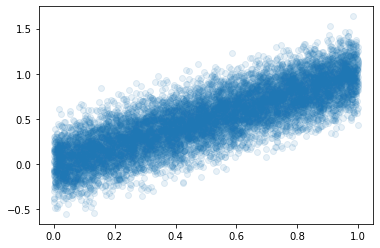

In [41]:
from scipy import stats
from sklearn.metrics import mean_squared_error

def line(x):
    m = 5
    c = 1
    return m*x + c 

def noise(x):
    return x + np.random.normal(0, 0.2)

x = np.random.random(10000)

noise_x = [noise(i) for i in x]

slope, intercept, r_value, p_value, std_err = stats.linregress(x,noise_x)
rms = mean_squared_error(x, noise_x, squared=False)

print(rms)
print(r_value**2)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,line(x))
rms = mean_squared_error(x, line(x), squared=False)

print(rms)
print(r_value**2)

#plt.scatter(x, line(x))
plt.scatter(x, [noise(i) for i in x], alpha=0.1)